In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("OPSD_Germany_all.csv", parse_dates=True, index_col="Date")
data.columns

Index(['Consumption', 'Wind', 'Solar'], dtype='object')

In [22]:
data = data["01/01/2012":]
data["Renewable"] = data["Wind"] + data["Solar"]
ratio = data.loc["2014-09","Renewable"].sum() / data.loc["2014-09", "Consumption"].sum()
print(f"During September 2014 the ratio of renewable energy created to power consumption was: {ratio:.2f}")
data["Weekday"] = data.index.day_name()
df_sunday_wind = data.loc[data["Weekday"] == "Sunday", "Wind"]
df_sunday_wind.head()
df_sunday_wind["2017-01":"2017-03"].mean()
sns.set()

During September 2014 the ratio of renewable energy created to power consumption was: 0.13


Text(0.5, 1.0, 'Power consumption (GWh)')

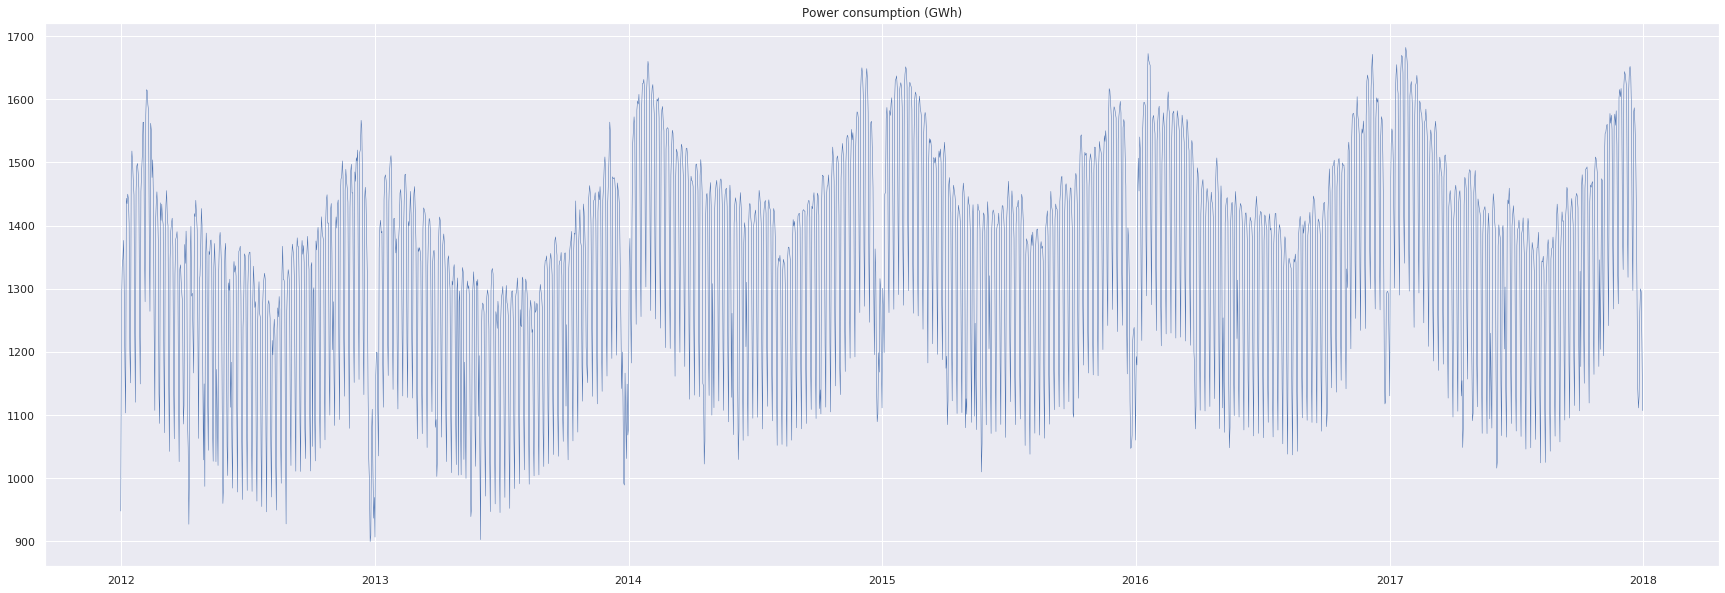

In [33]:
plt.figure(figsize=(30,10))
plt.plot(data["Consumption"], linestyle="-", linewidth=0.5)
plt.title("Power consumption (GWh)")

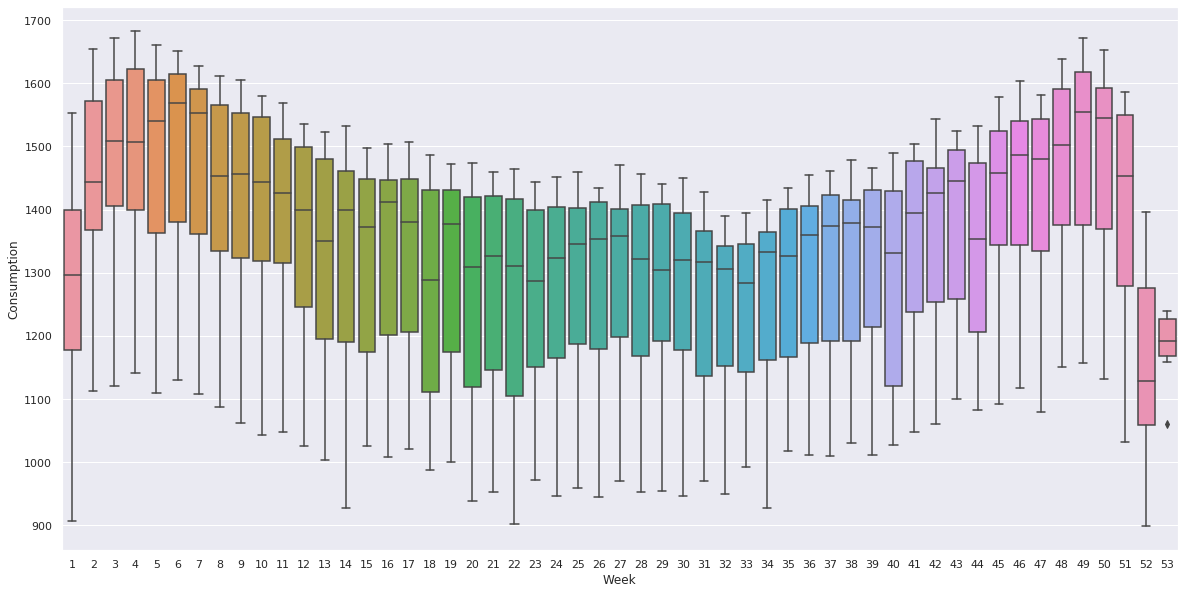

In [51]:
data["Week"] = data.index.week
data_by_week = data.groupby("Week")["Consumption"].mean()
#data_by_week.plot(figsize=(20,10))
plt.figure(figsize=(20,10))
sns.boxplot(x="Week", y="Consumption", data=data)


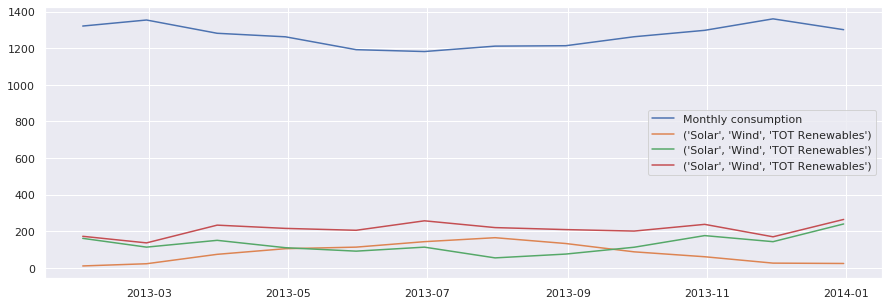

In [63]:
monthly_consumption_2013 = data["2013"]["Consumption"].resample("M").mean()
solar_wind_renewables_2013 = data["2013"].loc[:,["Solar","Wind","Renewable"]].resample("M").mean()
plt.figure(figsize=(15,5))
plt.plot(monthly_consumption_2013, label="Monthly consumption")
plt.plot(solar_wind_renewables_2013, label=("Solar", "Wind", "TOT Renewables"))
plt.legend()


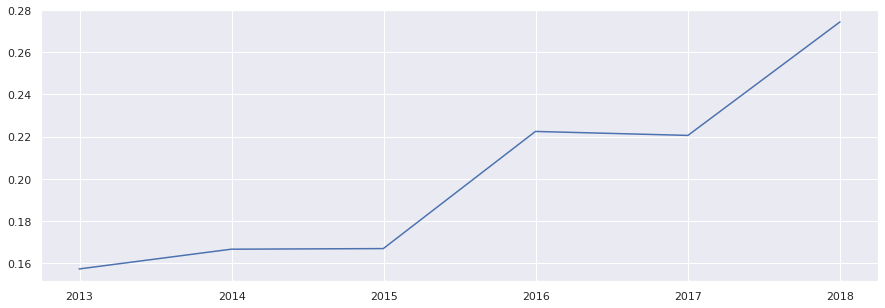

In [65]:
ren_csmp_ratio = data["Renewable"].resample("Y").mean() / data["Consumption"].resample("Y").mean()
plt.figure(figsize=(15,5))
plt.plot(ren_csmp_ratio)

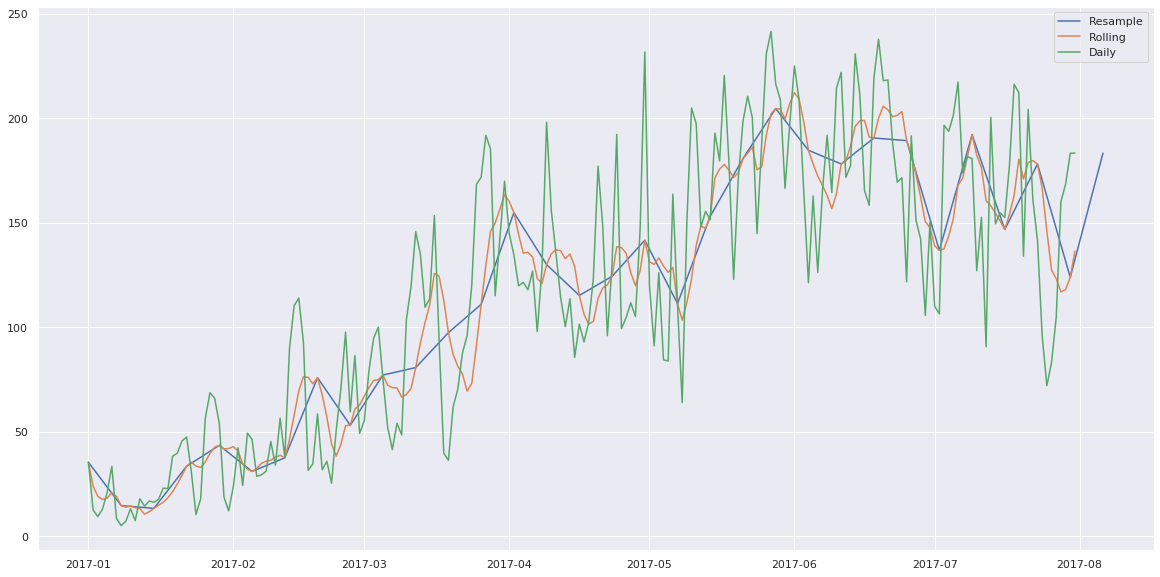

In [71]:
weekly_solar_resample = data["2017-01":"2017-07"]["Solar"].resample("W").mean()
weekly_solar_rolling = data["2017-01":"2017-07"]["Solar"].rolling("7D").mean()

plt.figure(figsize=(20,10))
plt.plot(weekly_solar_resample, label="Resample")
plt.plot(weekly_solar_rolling, label="Rolling")
plt.plot(data["2017-01":"2017-07"]["Solar"], label="Daily")
plt.legend()